In [6]:
import pandas
from matplotlib import pyplot

In [4]:
folder = '/mnt/d/Users/Leon Bein/Documents/HPI/V_Simulation/repository/AgentBased_Epidemic_Simulation/output/'

In [63]:
data = pandas.read_csv(folder+'Compartmental_Data.2020.Aug.19.12_46_26.csv')  
display(data)

,run,Exposed,Susceptible,Infectious,Symptomatic,Removed,tick
0,1,100.0,3900.0,0.0,0.0,0.0,1.0
1,1,100.0,3900.0,0.0,0.0,0.0,2.0
2,1,99.0,3900.0,1.0,0.0,0.0,3.0
3,1,99.0,3900.0,1.0,0.0,0.0,4.0
4,1,99.0,3900.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...
162038,66,96.0,3898.0,6.0,0.0,0.0,17.0
162039,66,96.0,3898.0,6.0,0.0,0.0,18.0
162040,66,96.0,3897.0,7.0,0.0,0.0,19.0
162041,66,92.0,3897.0,11.0,0.0,0.0,20.0


In [64]:
groups = list(filter(lambda column: column != 'run' and column != 'tick', data))
print(groups)

['Exposed', 'Susceptible', 'Infectious', 'Symptomatic', 'Removed']


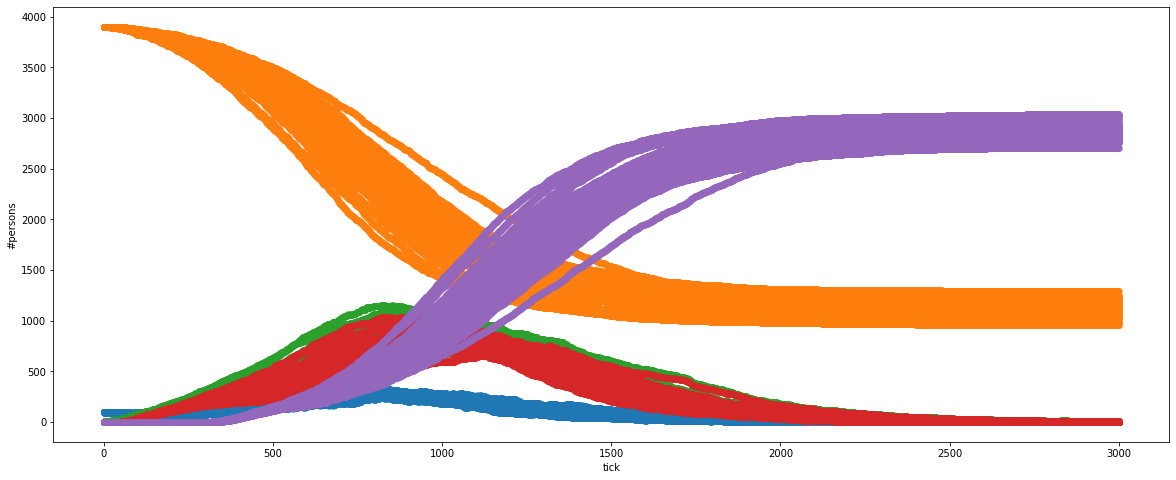

In [65]:
pyplot.figure(figsize=(20, 8))
pyplot.xlabel('tick')
pyplot.ylabel('#persons')
for group in groups:
    pyplot.plot(data['tick'], data[group], 'o', alpha=0.5)
# pyplot.savefig('figures/'+metric+'.png')

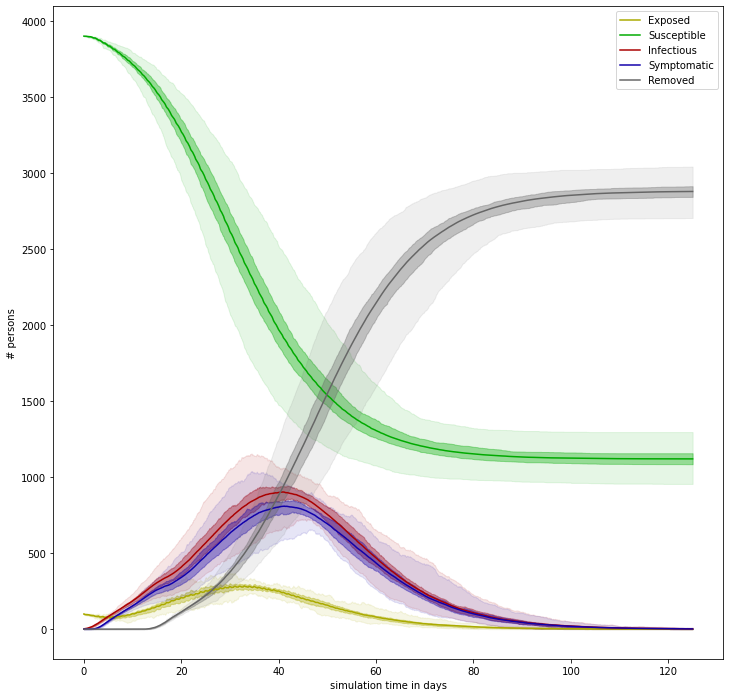

In [81]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel('simulation time in days')
pyplot.ylabel('# persons')
groupedData = data.groupby('tick', as_index=False)
means = groupedData.mean()
upper = groupedData.quantile(0.75)
lower = groupedData.quantile(0.25)
maxs = groupedData.max()
mins = groupedData.min()

colors = {'Exposed': '#AAAA00', 'Susceptible' : '#00AA00', 'Infectious' : '#AA0000', 'Symptomatic' : '#1100AA', 'Removed' : '#666666'}

for group in groups:
    pyplot.plot(means['tick']/24, means[group], color=colors[group])
    pyplot.fill_between(means['tick']/24, maxs[group], mins[group], alpha=0.1, color=colors[group])
    pyplot.fill_between(means['tick']/24, lower[group], upper[group], alpha=0.35, color=colors[group])
pyplot.legend(groups)

In [67]:
dataPerRun = data.groupby('run', as_index=False)

In [68]:
dataPerRun.size()

,run,size
0,1,3000
1,2,3000
2,3,3000
3,4,3000
4,5,3000
5,6,3000
6,7,3000
7,8,3000
8,9,3000
9,10,3000


In [70]:
pandas.read_csv(folder+'Compartmental_Data.2020.Aug.19.12_46_26.batch_param_map.csv')

,run,randomSeed,allowHomeOffice
0,1,104308707,True
1,3,104381741,True
2,5,104437727,True
3,7,104495555,True
4,9,104552850,True
5,11,104609950,True
6,13,104668232,True
7,15,104730471,True
8,17,104795807,True
9,19,104857419,True


# Functions

In [124]:
def plot_data(data, title='Untitled'):
    pyplot.figure(figsize=(12, 12))
    pyplot.title(title)
    pyplot.grid()
    pyplot.xlabel('simulation time in days')
    pyplot.ylabel('# persons')
    groupedData = data.groupby('tick', as_index=False)
    means = groupedData.mean()
    upper = groupedData.quantile(0.75)
    lower = groupedData.quantile(0.25)
    maxs = groupedData.max()
    mins = groupedData.min()

    colors = {'Exposed': '#AAAA00', 'Susceptible' : '#00AA00', 'Infectious' : '#AA0000', 'Symptomatic' : '#1100AA', 'Removed' : '#666666'}

    for group in groups:
        pyplot.plot(means['tick']/24, means[group], color=colors[group])
        pyplot.fill_between(means['tick']/24, maxs[group], mins[group], alpha=0.1, color=colors[group])
        pyplot.fill_between(means['tick']/24, lower[group], upper[group], alpha=0.35, color=colors[group])
    pyplot.legend(groups)

# Real used data

In [117]:
runId = 'Compartmental_Data.2020.Aug.19.18_56_25'

data = pandas.read_csv(folder+runId+'.csv')  
groups = list(filter(lambda column: column != 'run' and column != 'tick', data))

params = pandas.read_csv(folder+runId+'.batch_param_map.csv')
paramIds = list(filter(lambda column: column != 'run' and column != 'randomSeed', params))

merged = data.merge(params, on=['run'])

display(merged)

,run,Exposed,Susceptible,Infectious,Symptomatic,Removed,tick,allowHealthInsurance,randomSeed,allowHomeOffice
0,1,0.0,3990.0,10.0,0.0,0.0,1.0,True,115165308,True
1,1,1.0,3989.0,10.0,0.0,0.0,2.0,True,115165308,True
2,1,1.0,3989.0,10.0,0.0,0.0,3.0,True,115165308,True
3,1,1.0,3989.0,10.0,0.0,0.0,4.0,True,115165308,True
4,1,1.0,3989.0,10.0,0.0,0.0,5.0,True,115165308,True
...,...,...,...,...,...,...,...,...,...,...
1199995,400,0.0,51.0,0.0,0.0,3949.0,2996.0,False,127889691,False
1199996,400,0.0,51.0,0.0,0.0,3949.0,2997.0,False,127889691,False
1199997,400,0.0,51.0,0.0,0.0,3949.0,2998.0,False,127889691,False
1199998,400,0.0,51.0,0.0,0.0,3949.0,2999.0,False,127889691,False


In [120]:
for group, data in merged.groupby(paramIds):
    print(group)

(False, False)
(False, True)
(True, False)
(True, True)


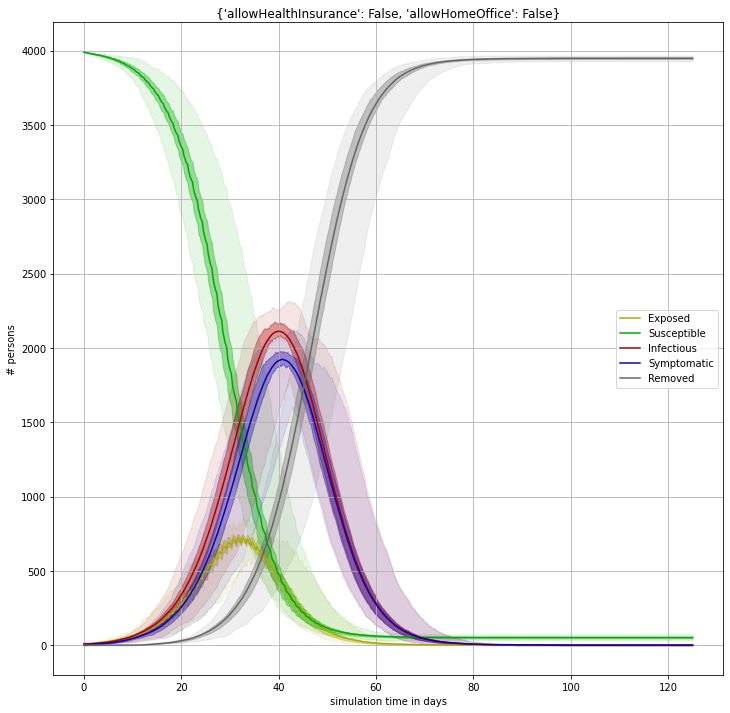

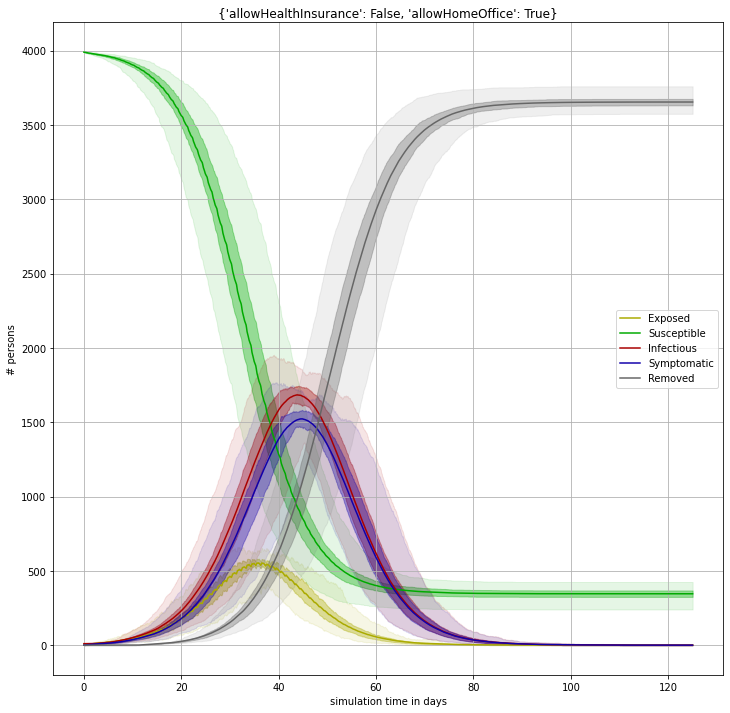

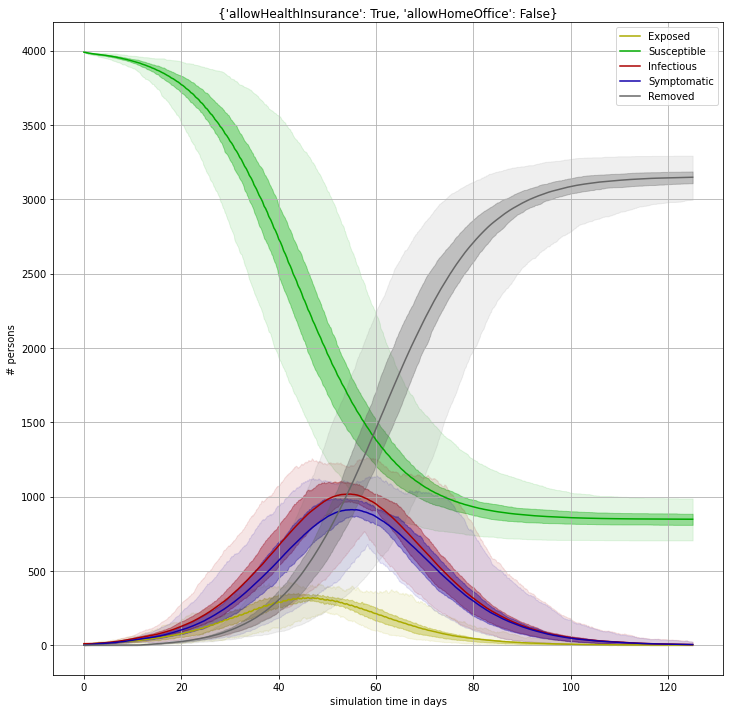

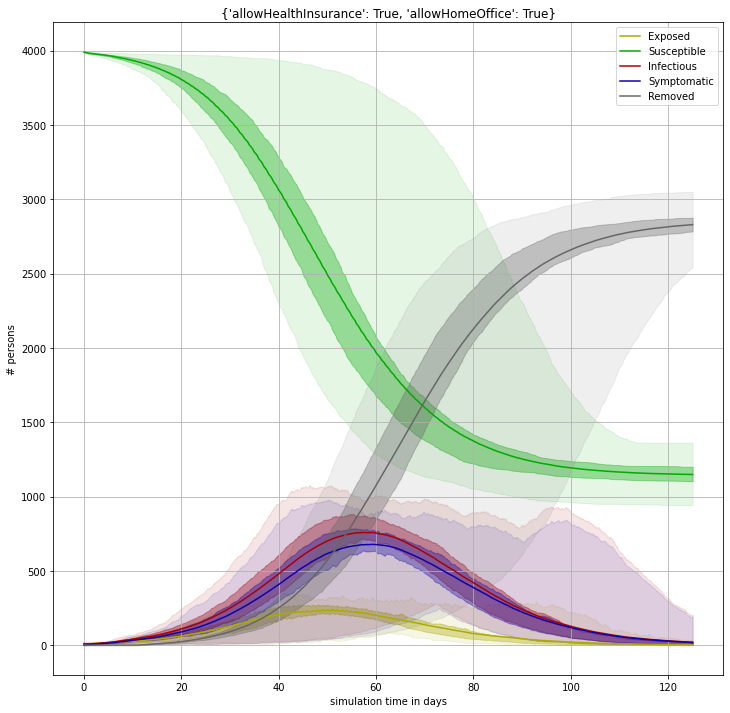

In [125]:
for group, data in merged.groupby(paramIds):
    plot_data(data, str(dict(zip(paramIds, group))))

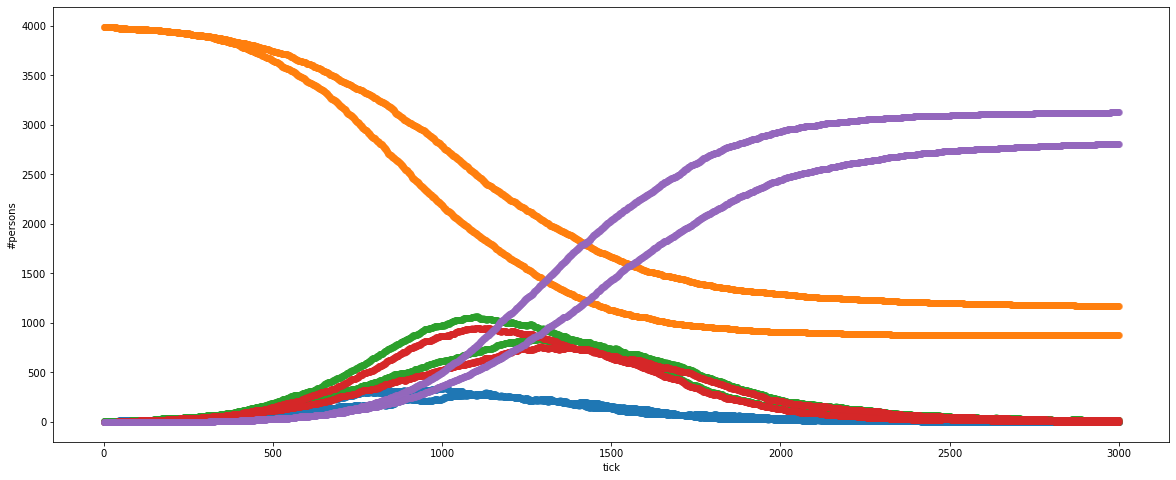

In [83]:
pyplot.figure(figsize=(20, 8))
pyplot.xlabel('tick')
pyplot.ylabel('#persons')
for group in groups:
    pyplot.plot(data['tick'], data[group], 'o', alpha=0.5)
# pyplot.savefig('figures/'+metric+'.png')